# RegresiónTotal

# Covid-19 infección en Ecuador. Modelos matemáticos y predicciones
Una comparación de modelos, lineal, polilnomico,logísticos y exponenciales aplicados a la infección por el virus Covid-19

Se realiza un análisis matemático simple del crecimiento de la infección en Python y dos modelos para comprender mejor la evolución de la infección.

Se crea modelos de series temporales del número total de personas infectadas hasta la fecha (es decir, las personas realmente infectadas más las personas que han sido infectadas). Estos modelos tienen parámetros , que se estimarán por ajuste de curva.

In [16]:
# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline


In [17]:
# Actualizar los datos (URL)

url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

df = pd.read_csv(url)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91271,ZWE,Africa,Zimbabwe,2021-05-21,38664.0,29.0,18.429,1586.0,1.0,0.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
91272,ZWE,Africa,Zimbabwe,2021-05-22,38679.0,15.0,17.857,1586.0,0.0,0.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
91273,ZWE,Africa,Zimbabwe,2021-05-23,38682.0,3.0,17.429,1586.0,0.0,0.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
91274,ZWE,Africa,Zimbabwe,2021-05-24,38696.0,14.0,17.714,1586.0,0.0,0.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


Imprimos los resultados y agregamos el numero del dia


In [18]:
df = df[df['location'].isin(['Ecuador'])] #Filtro la Informacion solo para Ecuador
df = df.loc[:,['date','total_cases']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)

df

,date,total_cases
23897,60,6.0
23898,61,6.0
23899,62,7.0
23900,63,10.0
23901,64,13.0
...,...,...
24343,506,416621.0
24344,507,417840.0
24345,508,418851.0
24346,509,419198.0


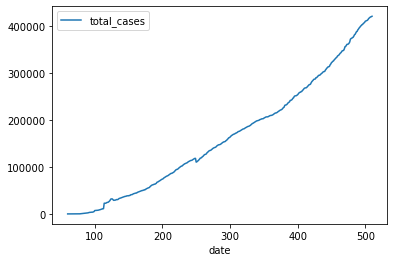

In [19]:
df.plot(x ='date', y='total_cases')

Ahora podemos analizar los cuatro modelos que tomaré en el examen, que son la función lineal, polinomica,logística y la función exponencial . Cada modelo tiene tres parámetros , que se estimarán mediante un cálculo de ajuste de curva en los datos históricos.

## EL modelo lineal

La regresión lineal es un algoritmo de aprendizaje supervisado que se utiliza en Machine Learning y en estadística. En su versión más sencilla, lo que haremos es «dibujar una recta» que nos indicará la tendencia de un conjunto de datos continuos.

Recordemos rápidamente la fórmula de la recta:

Y = mX + b

Donde Y es el resultado, X es la variable, m la pendiente (o coeficiente) de la recta y b la constante o también conocida como el «punto de corte con el eje Y» en la gráfica (cuando X=0)
Ejemplo
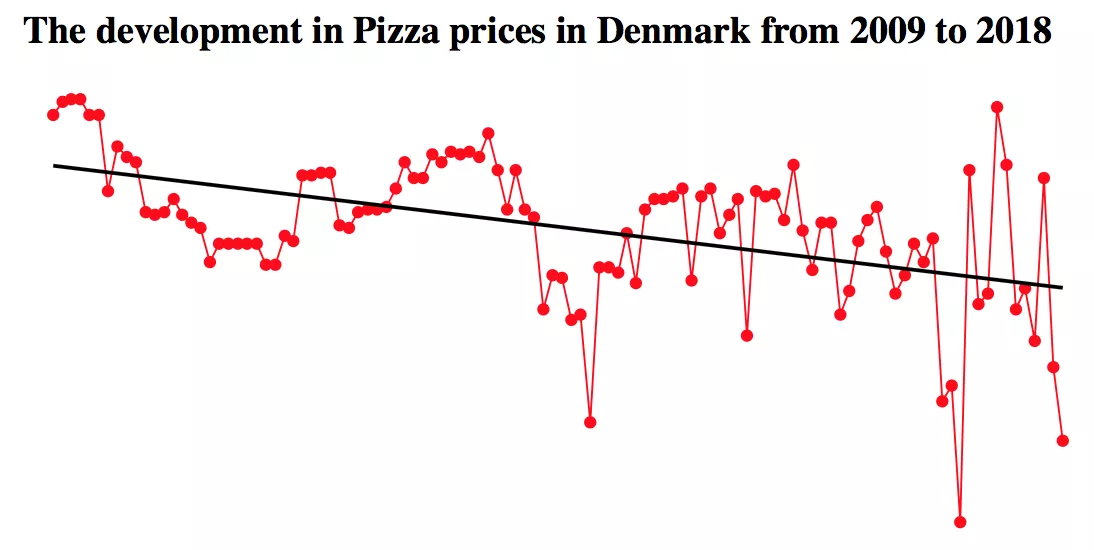

Recordemos que los algoritmos de Machine Learning Supervisados, aprenden por sí mismos y -en este caso- a obtener automáticamente esa «recta» que buscamos con la tendencia de predicción. Para hacerlo se mide el error con respecto a los puntos de entrada y el valor «Y» de salida real.



In [20]:
x = list(df.iloc [:, 0]) # Fecha
y = list(df.iloc [:, 1]) # Numero de casos
# Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(np.array(x).reshape(-1, 1) ,y)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio

Coefficients: 
 [917.76149023]
Independent term: 
 -99479.82959401925


De la ecuación de la recta y = mX + b nuestra pendiente «m» es el coeficiente y el término independiente «b»


In [21]:
#Vamos a comprobar:
# Quiero predecir cuántos "Casos" voy a obtener por en el dia 100,
# según nuestro modelo, hacemos:
y_prediccion = regr.predict([[100]])
print(int(y_prediccion))

-7703


[50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]


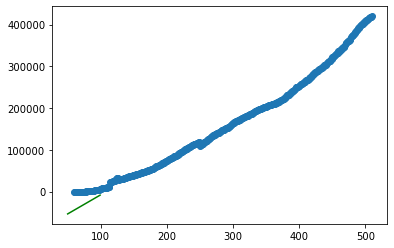

In [22]:
#Graficar
plt.scatter(x, y)
x_real = np.array(range(50, 100))
print(x_real)
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='green')
plt.show()



## El modelo logistico

El modelo logístico se ha utilizado ampliamente para describir el crecimiento de una población. Una infección puede describirse como el crecimiento de la población de un agente patógeno, por lo que un modelo logístico parece razonable .
La expresión más genérica de una función logística es:

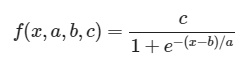

En esta fórmula, tenemos la variable x que es el tiempo y tres parámetros: a, b, c .

- a se refiere a la velocidad de infección
- b es el día en que ocurrieron las infecciones máximas
- c es el número total de personas infectadas registradas al final de la infección
 


A continuacion se puede apreciar un ejemplo de regresion logistica
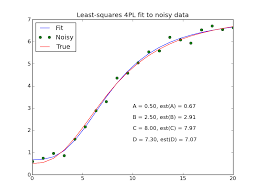

Definamos la función en Python y realicemos elprocedimiento de ajuste de curva utilizado para el crecimiento logístico.

In [23]:
def modelo_logistico(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(modelo_logistico,x,y) #Extraemos los valores de los paramatros
print(exp_fit)


(array([-942382.46853739,  200121.80287549]), array([[ 4.92645725e+08, -8.83646404e+07],
       [-8.83646404e+07,  1.60110973e+07]]))


## Gráficas

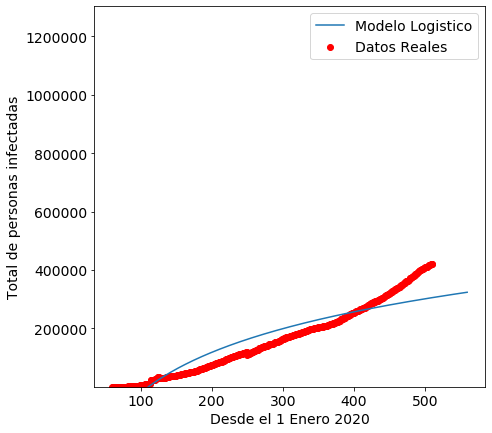

In [24]:
pred_x = list(range(min(x),max(x)+50)) # Predecir 50 dias mas
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Datos Reales",color="red")
# Predicted exponential curve
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.xlabel("Desde el 1 Enero 2020")
plt.ylabel("Total de personas infectadas")
plt.ylim((min(y)*0.9,max(y)*3.1)) # Definir los limites de Y
plt.show()

## Modelo exponencial

Mientras que el modelo logístico describe un crecimiento de infección que se detendrá en el futuro, el modelo exponencial describe un crecimiento de infección imparable . Por ejemplo, si un paciente infecta a 2 pacientes por día, después de 1 día tendremos 2 infecciones, 4 después de 2 días, 8 después de 3 y así sucesivamente.
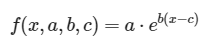

A continuacion se tiene un ejemplo de regresion exponencial
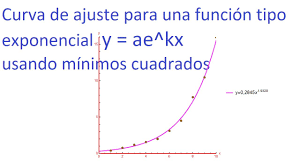

[0.01255663 7.62895885]


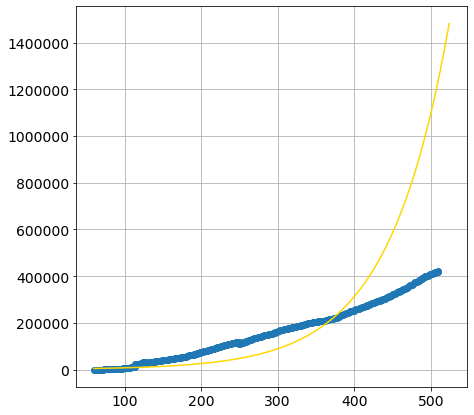

In [25]:
# Implementar
curve_fit = np.polyfit(x, np.log(y), deg=1)
print(curve_fit)
pred_x = np.array(list(range(min(x), max(x)+15)))
yx = np.exp(curve_fit[1]) * np.exp(curve_fit[0]*pred_x)
plt.plot(x,y,"o")
plt.plot(pred_x,yx, color="gold")
plt.grid(True)

## Modelo polinomial
Predicción de una variable de respuesta cuantitativa a partir de una variable predictora cuantitativa, donde la relación se modela como una función polinomial de orden n (esto significa que pueden tener de diferentes exponenciales o grados y se debe ir probando)  

Se puede tener una ecuacion con diferentes grados

y = a0 + a1x + a2x^2 + a3x^3 + … + anx^n + ε

Ejemplo de una regresion polinomica de grado 4.
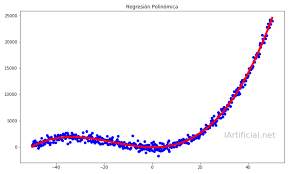


Función Resultado
           4           3         2
2.216e-05 x - 0.02297 x + 9.059 x - 771.6 x + 1.637e+04


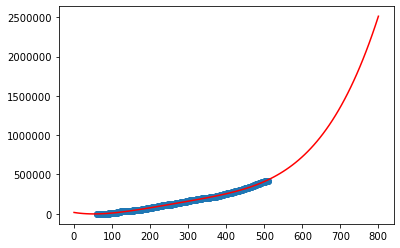

In [32]:
# Implementar 


# Se puede implementar modelos adicionales o conversion de datos 
# Se tomara como puntos adicionales a las practicas.

# calculamos la curva polinomica de 4 grado que se ajusta a los datos  
# usando la funcion polyfit  

p4 = np.poly1d(np.polyfit(x, y, 4))
print("Función Resultado")
print(p4)
# pintamos la muestra y la funcion polinomica en rojo para ver como se ajusta  
import matplotlib.pyplot as plt

xp = np.linspace(0, 800, 100)  
plt.scatter(x, y)  
plt.plot(xp, p4(xp), c='r')  
plt.show()

## Número de Casos

           4           3         2
2.216e-05 x - 0.01774 x + 5.457 x + 75.8 x - 2067


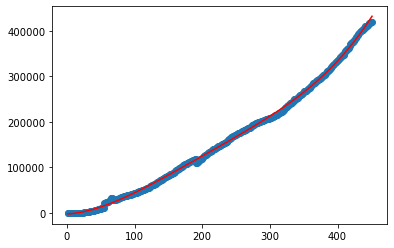

In [33]:

df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv').fillna(0) # poniendo datos nan a cero
ndf= df.loc[(df['location'] == 'Ecuador') & (df['total_cases'] != 0)] # filtrando por pais y no ceros 
ndf1=ndf[['date','total_cases','total_deaths']]
x=np.arange(1,len(ndf1)+1,1, dtype='float') # arreglo de x lo creo para simular el numero del dia y el numero de casos
y=np.array(ndf1.values[:,1], dtype='float')
y1=np.array(ndf1.values[:,2],dtype='float')

# Numero de Casos
fun1 = np.poly1d(np.polyfit(x, y, 4))
print(fun1)
plt.scatter(x, y)  
plt.plot(x, fun1(x), c='r')  
plt.show()
#ndf1

## Número de Muertes

       4            3          2
3e-06 x - 0.002855 x + 0.8491 x - 33.31 x + 464.9


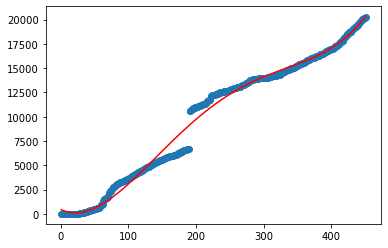

In [36]:
fun1 = np.poly1d(np.polyfit(x, y1, 4))
print(fun1)
plt.scatter(x, y1)  
plt.plot(x, fun1(x), c='r')  
plt.show()

## Analisis

Mediante los modelos de regresión realizamos un análisis sobre los contagios de covid-19, de lo cuál se podrá definir cuál es el mejor modelo de predicción.

## Conclusiones

Como se puede observar se obtiene un menor grado de error mediante el módelo polinómico.

## Criterio personal (politico, economico y  social de la situacion)

- Los países latinoamericanos no tienen medios, recursos, tecnología ni la capacidad de acción para seguir el ejemplo de Corea del Sur: emprender una campaña masiva para examinar a la población, independientemente de si tienen síntomas o no y, en un marco de transparencia absoluta, hacer pruebas masivas para detectar el virus. 
- Lo que sí puede hacer la región es apostar por la toma de medidas más drásticas lo antes posible, ceñidas a la evidencia científica y a la experiencia de otros países que han resultado exitosas para la gestión de los brotes. Se trata de aprovechar este mayor margen de acción que resulta vital para compensar las debilidades que tiene la región en cuanto a medios humanos y técnicos, así como las insuficiencias financieras.

- Todo indica que, salvo excepciones, la mayoría de los países han tomado decisiones más drásticas y de forma más acelerada que en la UE o EEUU. Esto resulta clave de cara a ralentizar la expansión del coronavirus y así ganar tiempo para evitar el colapso de unos servicios sanitarios que presentan graves ineficiencias. Aunque no garantiza el éxito.

# Referencias

- https://www.researchgate.net/publication/340092755_Infeccion_del_Covid-19_en_Colombia_Una_comparacion_de_modelos_logisticos_y_exponenciales_aplicados_a_la_infeccion_por_el_virus_en_Colombia

- https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/

- http://www.realinstitutoelcano.org/wps/portal/rielcano_es/contenido?WCM_GLOBAL_CONTEXT=/elcano/elcano_es/zonas_es/ari27-2020-malamud-nunez-covid-19-en-america-latina-desafios-politicos-retos-sistemas-sanitarios-e+incertidumbre-economica